# step - 1 Importing the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

# step-2 Creating the Dataset instance / Data Collection

In [5]:
data = pd.read_csv("stroke.csv")
print("dataset read")
print(data.head())

print("Shape of the dataset: ",data.shape)

dataset read
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
Shape of the dataset:  (5110, 12)


In [6]:
print(data.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [7]:
columns = data.columns
print(columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [8]:
input_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level']

X = pd.DataFrame(data[input_columns])

In [9]:
y = data['stroke']
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64


In [15]:
from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import LabelEncoder

categorical_col = ['gender', 'ever_married', 'work_type', 'Residence_type']
le = LabelEncoder()

for col in categorical_col:
    X[col] = le.fit_transform(X[col])

print(X.head())

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level  
0               1             228.69  
1               0             202.21  
2               0             105.92  
3               1             171.23  
4               0             174.12  


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [16]:
acc = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    acc.append(accuracy_score(y_test, pred_i))

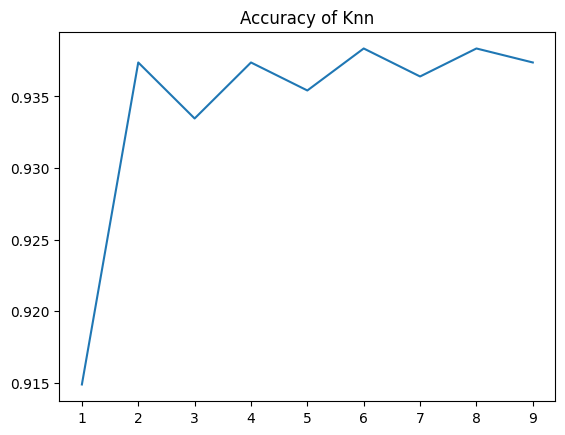

In [17]:
import matplotlib.pyplot as plt

x = np.linspace(1, 9, 9)

plt.plot(x, acc)
plt.title("Accuracy of Knn")
plt.show()